In [23]:
import numpy as np 
import pandas as pd 

%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd



from sklearn import ensemble
from sklearn import linear_model
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
import sklearn.metrics as metrics
from collections import Counter

/Users/swatimakhija/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/swatimakhija/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [5]:
df = pd.read_csv("data/listings.csv", error_bad_lines=False) 

/Users/swatimakhija/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [9]:
df.shape


(8290, 96)

In [10]:
df.isnull().sum()

id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   0
summary                              427
space                               1816
description                           26
experiences_offered                    0
neighborhood_overview               2533
notes                               3574
transit                             2581
access                              2539
interaction                         2404
house_rules                         1866
thumbnail_url                       8290
medium_url                          8290
picture_url                            0
xl_picture_url                      8290
host_id                                0
host_url                               0
host_name                              0
host_since                             0
host_location                         21
host_about      

In [11]:
df = df.drop(columns = ['thumbnail_url', 'medium_url', 'license', 'host_acceptance_rate', 'xl_picture_url' ])

In [12]:
df.isnull().sum()

id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   0
summary                              427
space                               1816
description                           26
experiences_offered                    0
neighborhood_overview               2533
notes                               3574
transit                             2581
access                              2539
interaction                         2404
house_rules                         1866
picture_url                            0
host_id                                0
host_url                               0
host_name                              0
host_since                             0
host_location                         21
host_about                          2222
host_response_time                  1345
host_response_rate                  1345
host_is_superhos

In [14]:
df['price'].head()


0    $296.00
1     $82.00
2     $48.00
3     $90.00
4     $70.00
Name: price, dtype: object

In [15]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2318,https://www.airbnb.com/rooms/2318,20180717023704,2018-07-17,"Casa Madrona - Urban Oasis, 1 block from the P...","Gorgeous, architect remodeled, 1917 Dutch Colo...","Casa Madrona is a gorgeous, architect remodele...","Gorgeous, architect remodeled, 1917 Dutch Colo...",none,NaN,...,10.0,f,{WASHINGTON},t,f,strict_14_with_grace_period,f,f,2,0.16
1,4291,https://www.airbnb.com/rooms/4291,20180717023704,2018-07-17,Sunrise in Seattle Master Suite,This property is located in the lovely Maple L...,"Located in Seattle, this is a spacious, clean ...",This property is located in the lovely Maple L...,none,NaN,...,9.0,f,{WASHINGTON},f,f,moderate,f,f,5,0.88
2,5682,https://www.airbnb.com/rooms/5682,20180717023704,2018-07-17,"Cozy Studio, min. to downtown -WiFi",The Cozy Studio is a perfect launchpad for you...,"Hello fellow travelers, Save some money and ha...",The Cozy Studio is a perfect launchpad for you...,none,NaN,...,10.0,f,{WASHINGTON},f,f,strict_14_with_grace_period,f,t,1,4.34
3,6606,https://www.airbnb.com/rooms/6606,20180717023704,2018-07-17,"Fab, private seattle urban cottage!",NaN,"Soo centrally located, this is a little house ...","Soo centrally located, this is a little house ...",none,"A peaceful yet highly accessible neighborhood,...",...,9.0,f,{WASHINGTON},f,f,strict_14_with_grace_period,f,f,3,1.11
4,9419,https://www.airbnb.com/rooms/9419,20180717023704,2018-07-17,Glorious sun room w/ memory foambed,This beautiful double room features a magical ...,Our new Sunny space has a private room from th...,This beautiful double room features a magical ...,none,"Lots of restaurants (see our guide book) bars,...",...,9.0,f,{WASHINGTON},f,f,moderate,t,t,5,1.26


In [16]:
df['smart_location']

0       Seattle, WA
1       Seattle, WA
2       Seattle, WA
3       Seattle, WA
4       Seattle, WA
5       Seattle, WA
6       Seattle, WA
7       Seattle, WA
8       Seattle, WA
9       Seattle, WA
10      Seattle, WA
11      Seattle, WA
12      Seattle, WA
13      Seattle, WA
14      Seattle, WA
15      Seattle, WA
16      Seattle, WA
17      Seattle, WA
18      Seattle, WA
19      Seattle, WA
20      Seattle, WA
21      Seattle, WA
22      Seattle, WA
23      Seattle, WA
24      Seattle, WA
25      Seattle, WA
26      Seattle, WA
27      Seattle, WA
28      Seattle, WA
29      Seattle, WA
           ...     
8260    Seattle, WA
8261    Seattle, WA
8262    Seattle, WA
8263    Seattle, WA
8264    Seattle, WA
8265    Seattle, WA
8266    Seattle, WA
8267    Seattle, WA
8268    Seattle, WA
8269    Seattle, WA
8270    Seattle, WA
8271    Seattle, WA
8272    Seattle, WA
8273    Seattle, WA
8274    Seattle, WA
8275    Seattle, WA
8276    Seattle, WA
8277    Seattle, WA
8278    Seattle, WA


In [27]:
df['price'].dtypes

dtype('O')

In [28]:
df['price'] = df['price'].replace('[\$,)]','',  \
        regex=True).replace('[(]','-', regex=True).astype(float)

In [29]:
df['price'].dtypes

dtype('float64')

In [31]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'we

In [36]:
df['neighbourhood_cleansed'].dtypes

dtype('O')

In [37]:
neighbourhood_dummies = pd.get_dummies(df.neighbourhood_cleansed)
room_type_dummies = pd.get_dummies(df.room_type)
cancellation_policy_dummies = pd.get_dummies(df.cancellation_policy)

In [39]:
instant_bookable_dummies = pd.get_dummies(df.instant_bookable, prefix="instant")
instant_bookable_dummies = instant_bookable_dummies.drop('instant_f', axis=1)

In [48]:
#df.head()
alldata.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,Entire home/apt,Private room,Shared room,flexible,moderate,strict,strict_14_with_grace_period,super_strict_30,super_strict_60,instant_t
0,2318,https://www.airbnb.com/rooms/2318,20180717023704,2018-07-17,"Casa Madrona - Urban Oasis, 1 block from the P...","Gorgeous, architect remodeled, 1917 Dutch Colo...","Casa Madrona is a gorgeous, architect remodele...","Gorgeous, architect remodeled, 1917 Dutch Colo...",none,NaN,...,1,0,0,0,0,0,1,0,0,1
1,4291,https://www.airbnb.com/rooms/4291,20180717023704,2018-07-17,Sunrise in Seattle Master Suite,This property is located in the lovely Maple L...,"Located in Seattle, this is a spacious, clean ...",This property is located in the lovely Maple L...,none,NaN,...,0,1,0,0,1,0,0,0,0,0
2,5682,https://www.airbnb.com/rooms/5682,20180717023704,2018-07-17,"Cozy Studio, min. to downtown -WiFi",The Cozy Studio is a perfect launchpad for you...,"Hello fellow travelers, Save some money and ha...",The Cozy Studio is a perfect launchpad for you...,none,NaN,...,1,0,0,0,0,0,1,0,0,0
3,6606,https://www.airbnb.com/rooms/6606,20180717023704,2018-07-17,"Fab, private seattle urban cottage!",NaN,"Soo centrally located, this is a little house ...","Soo centrally located, this is a little house ...",none,"A peaceful yet highly accessible neighborhood,...",...,1,0,0,0,0,0,1,0,0,0
4,9419,https://www.airbnb.com/rooms/9419,20180717023704,2018-07-17,Glorious sun room w/ memory foambed,This beautiful double room features a magical ...,Our new Sunny space has a private room from th...,This beautiful double room features a magical ...,none,"Lots of restaurants (see our guide book) bars,...",...,0,1,0,0,1,0,0,0,0,0


In [42]:
alldata = pd.concat((df.drop(['neighbourhood_cleansed', \
    'room_type', 'cancellation_policy', 'instant_bookable'], axis=1), \
    neighbourhood_dummies.astype(int), room_type_dummies.astype(int), \
    cancellation_policy_dummies.astype(int), instant_bookable_dummies.astype(int)), \
    axis=1)
allcols = alldata.columns

In [43]:
allcols

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'Entire home/apt', 'Private room', 'Shared room', 'flexible',
       'moderate', 'strict', 'strict_14_with_grace_period', 'super_strict_30',
       'super_strict_60', 'instant_t'],
      dtype='object', length=185)

In [50]:
alldata = alldata.drop(columns = ['require_guest_profile_picture', 'require_guest_phone_verification'])

/Users/swatimakhija/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


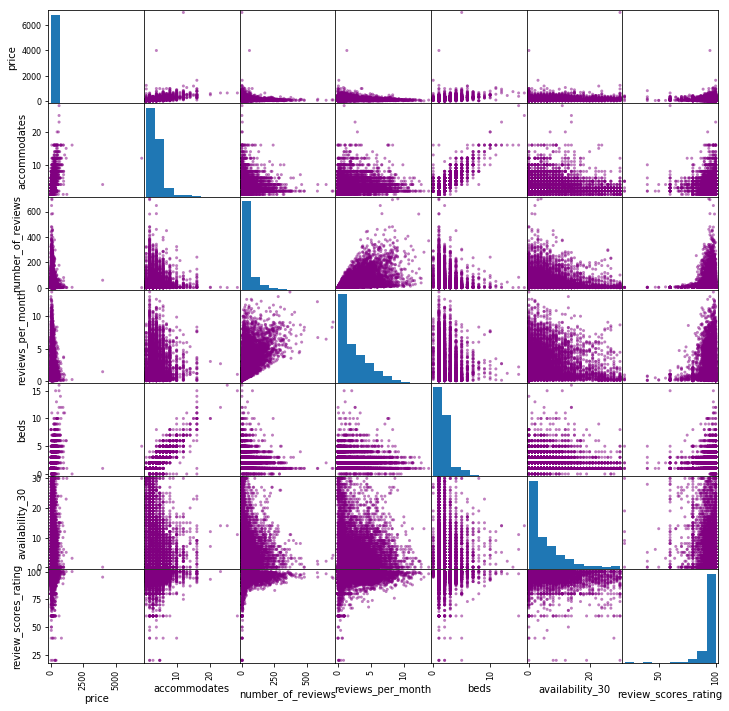

In [51]:
scattercols = ['price','accommodates', 'number_of_reviews', 'reviews_per_month', 'beds', 'availability_30', 'review_scores_rating']
axs = pd.scatter_matrix(alldata[scattercols],
                        figsize=(12, 12), c='purple')

In [54]:
rs = 1
tests = [ linear_model.LinearRegression(), linear_model.Ridge(),
        linear_model.Lasso(), linear_model.ElasticNet(),
        linear_model.BayesianRidge(), linear_model.OrthogonalMatchingPursuit() ]
tests_labels = np.array(['Linear', 'Ridge', 'Lasso', 'ElasticNet', 'BayesRidge', 'OMP'])
errvals = np.array([])

X_train, X_test, y_train, y_test = train_test_split(alldata.drop(['price'], axis=1),
                                                    alldata.price, test_size=0.2, random_state=42)

for t in tests:
    t.fit(X_train, y_train)
    this_err = metrics.median_absolute_error(y_test, t.predict(X_test))
    #print "got error %0.2f" % this_err
    errvals = np.append(errvals, this_err)

pos = np.arange(errvals.shape[0])
srt = np.argsort(errvals)
plt.figure(figsize=(7,5))
plt.bar(pos, errvals[srt], align='center')
plt.xticks(pos, ests_labels[srt])
plt.xlabel('Estimator')
plt.ylabel('Median Absolute Error')


ValueError: could not convert string to float: 'f'